In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("County_accidents_2018.csv")

In [3]:
df.head(5)

,County1,Count,Population,Unnamed: 3,#VALUE!,Unnamed: 5,county,population,Unnamed: 8,Unnamed: 9,county2,acc2,pop2
0,DoÔøΩa Ana,27.0,NaN,NaN,NaN,NaN,Abbeville County,24541,138.0,NaN,Abbeville,138.0,24541.0
1,La Porte,3.0,NaN,NaN,NaN,NaN,Acadia Parish,62190,43.0,NaN,Acadia,43.0,62190.0
2,Macon-Bibb County,49.0,NaN,NaN,NaN,NaN,Accomack County,32412,20.0,NaN,Accomack,20.0,32412.0
3,Obrien,1.0,NaN,NaN,NaN,NaN,Ada County,469966,90.0,NaN,Ada,90.0,469966.0
4,Prince Georges,44.0,NaN,NaN,NaN,NaN,Adair County,73699,10.0,NaN,Adair,10.0,73699.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 13 columns):
County1       1527 non-null object
Count         1527 non-null float64
Population    1509 non-null float64
Unnamed: 3    0 non-null float64
#VALUE!       1508 non-null object
Unnamed: 5    0 non-null float64
county        1877 non-null object
population    1877 non-null object
Unnamed: 8    17 non-null float64
Unnamed: 9    0 non-null float64
county2       1526 non-null object
acc2          1526 non-null float64
pop2          1509 non-null float64
dtypes: float64(8), object(5)
memory usage: 190.8+ KB


In [5]:
df1 = df.loc[:,["county2","acc2","pop2"]]

In [6]:
df1.head(5)

,county2,acc2,pop2
0,Abbeville,138.0,24541.0
1,Acadia,43.0,62190.0
2,Accomack,20.0,32412.0
3,Ada,90.0,469966.0
4,Adair,10.0,73699.0


In [7]:
df2 = df1.dropna()

In [8]:
X = df2.loc[:,"pop2"]

In [9]:
X = df2.loc[:,"pop2"].values.reshape(-1,1)

In [10]:
y = df2.loc[:,"acc2"]

In [11]:
y= df2.loc[:,"acc2"].values.reshape(-1,1)

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

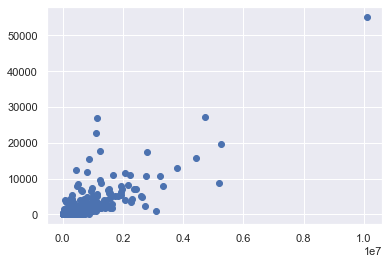

In [13]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [14]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
### END SOLUTION

In [15]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data

# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
# ### END SOLUTION

In [16]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# ### BEGIN SOLUTION
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# ### END SOLUTION

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

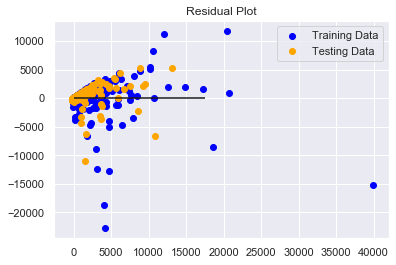

In [19]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [21]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1304395.8491996387, R2: 0.554299378535074


In [35]:
y_pred = model.predict([[2000000]])

In [36]:
y_pred

array([[7723.88830758]])

In [29]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

In [30]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1304395.8491897404, R2: 0.5542993785384562


In [33]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

In [34]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1304395.8491946696, R2: 0.554299378536772
